# Brazilian Food Claims

In [41]:
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/food_claims_2212.csv')
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.8+ KB


## Data Validation

*About the original data*

The given dataset has 2000 rows and 8 columns. These columns consist of 3 categorical and 5 numeric (2 discrete, 2 continuous, and 1 nominal) variables. The **claim_id** column (primary key) exists just as informative data in this case because of being a categorical variable type. Nevertheless, we may check its uniqueness to explore whether there is any missing or duplicated record.

________________
There is a conflict about the ***"individuals_on_claim"*** column in the instructions. According to the data dictionary, the 3rd criterion claims "the minimum person is 1.". The following measure points out replacing missing values with "0". Nonetheless, we can ignore the conflict since the "individuals_on_claim" does not have any missing values.

On the other hand, the ***claim_amont*** variable's data type had defined as a string instead of a float.



**Here are the given raw data types with pandas data frame transformation:**

*Unprocessed data types in dataframe*


|claim_id|time_to_close|claim_amount|amount_paid|location|individuals_on_claim|linked_cases|cause|
|---|---|---|---|---|---|---|---|
|int64|int64|<mark>object</mark>|float64|object|int64|object|object|


<font color='white'>____</font>

***About The given states of Variables***

- **claim_id:** The primary key of the dataset, considered as nominal
- **time_to_close:** Discrete, positive integers
- **claim_amount:** Wrong data type according to instructions, also involves the abbreviation of Brazilian Real as the prefix.
- **amount_paid:** Improper raw data type, stored as a string; has missing values
- **location** Categorical variable
- **individuals_on_claim :** Discrete, positive integers
- **linked_cases :** Boolean True/False, categorical variable, has missing values
- **cause :** Categorical variable, has case errors, blanks and typo


*We encountered the database storage errors such as datatype and prefix. The team who provides and maintains the data has to lead to fix it. They also have to be informed the stakeholders about being careful about this issue.*

In [28]:
df.nunique()

claim_id                2000
time_to_close            256
claim_amount            2000
amount_paid             1963
location                   4
individuals_on_claim      15
linked_cases               2
cause                      5
dtype: int64

In [43]:
df.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

### Missing Values
|Variable|Null Count|Fill NA Method
|---|---|---|
|claim_id                |0| 
|time_to_close           |0| 
|claim_amount            |0| 
|**amount_paid**         |**<mark>36</mark>**| **Overall Median** | 
|location                |0| 
|individuals_on_claim    |0| 
|**linked_cases**        |**<mark>26</mark>**| **False** |
|cause                   |0| 

In the dataset, **amount_paid** and **linked_cases** variables have null values shown at above table.

In [30]:
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


In [44]:
cols = df.columns
for col in cols:
    print(col, "variable' s distinct values_____________________________:")
    print(df[col].unique())

claim_id variable' s distinct values_____________________________:
[   1    2    3 ... 1998 1999 2000]
time_to_close variable' s distinct values_____________________________:
[317 195 183 186 138 190 149 180 208 175 223 265 235 229 189 204 129 167
 119 177 170 148 173 184 172 237 262 136 181 161 146 243 233 125 166 178
 111 168 301 192 250 185 140 248 196 130 179 290 215 182 159 105 188 109
 267 142 276 293 226 187 153 132 157 144 200 199 156 165 273 120 247 280
 238 134 176 359 160 355 297 245 126 127 108 218 118 102 143 133 227 214
 358 163 234 115 139 171 210 158 240 145 322 228 155 124 162 207 256 174
 194 131 212 246 169 230 217 292 345 219 225 164 152 203 213 137 197 261
 224 206 193 141 325 220 244 318 135 277 254  84 191 104 121 259 202 341
 198 231 232 211 275 110  76 222 257 113 499 274 216 270 205 221 299 260
 272 151  98 326 367 352 294  95 360 370 123 453 327 279 249 117 241 307
 384 147 419 310 209 285 316 106 286 122 253 116 268 320 107 101 201 281
 313 150 271 284 251 2

### Differences between the original (RAW) and processed (VALID) data
| Variables | Type (Raw) |Type (Valid)| Distinct Values (Raw) | Distinct Values (Valid)| Min Value | Max Value|
|----|----|----|----|----|----|----|
|claim_id                |num|numeric - nominal|2000|2000|1|2000|
|time_to_close           |num|numeric - discrete|256|256|76|518|
|claim_amount            |cat|numeric - continuous|2000|2000|1637.94|76106.80|
|amount_paid             |num|numeric - continuous|1963|1964|1516.72|52498.75|
|location                |cat|categorical - nominal|4|4|||
|individuals_on_claim    |num|numeric - discrete|15|15|1|15|
|linked_cases            |cat|categorical - nominal|2|2|||
|cause                   |cat|categorical - nominal|5|3|||

&nbsp;

**Processes:**
- We explored that dataset has 2000 records, and **claim_id** has no duplicated or missing records as above findings. 
- The **claim_amount** variable cleared from the prefix. 
- The **cause** variable was trimmed, upper-cased, and modified to combine designation differences. 
- The data types of **claim_amount** and **amount_paid** transformed to 2-decimal rounded floats according to the instructions. 
- Missing values were filled as requested(<ins>amount_paid: *Median*</ins>, <ins>linked_cases *False*</ins>).

> Overall median of amount_paid variable: 20105.70
_________________________

In [45]:
df['cause'] = df['cause'].str.replace(" ", "")
df['cause'] = df['cause'].str.replace("vegetable", "VEGETABLES")
df['cause'] = df['cause'].str.upper()
df['claim_amount'] = df['claim_amount'].str.replace("R$ ", "", regex=False)
df.claim_amount = df.claim_amount.astype(float)
df.amount_paid = df.amount_paid.astype(float)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,UNKNOWN
1,2,195,52137.83,42111.30,FORTALEZA,12,True,UNKNOWN
2,3,183,24447.20,23986.30,SAO LUIS,10,True,MEAT
3,4,186,29006.28,27942.72,FORTALEZA,11,False,MEAT
4,5,138,19520.60,16251.06,RECIFE,11,False,VEGETABLES


In [47]:
rval = ['error',
        df['time_to_close'].median(),
        df['claim_amount'].median(),
        df['amount_paid'].median(),
        'error',
        0,
        False,
        'UNKNOWN']

fna_rp_val = dict(zip(cols, rval))

for v in fna_rp_val:
    print(v, "-", fna_rp_val[v])

print(fna_rp_val)
df = df.fillna(value=fna_rp_val)

df.head()

claim_id - error
time_to_close - 179.0
claim_amount - 24821.085
amount_paid - 20105.699999999997
location - error
individuals_on_claim - 0
linked_cases - False
cause - UNKNOWN
{'claim_id': 'error', 'time_to_close': 179.0, 'claim_amount': 24821.085, 'amount_paid': 20105.699999999997, 'location': 'error', 'individuals_on_claim': 0, 'linked_cases': False, 'cause': 'UNKNOWN'}


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,UNKNOWN
1,2,195,52137.83,42111.30,FORTALEZA,12,True,UNKNOWN
2,3,183,24447.20,23986.30,SAO LUIS,10,True,MEAT
3,4,186,29006.28,27942.72,FORTALEZA,11,False,MEAT
4,5,138,19520.60,16251.06,RECIFE,11,False,VEGETABLES


### Summary

*About the ranges and values after cleansing processes*

|||
|---|---|
|**claim_id** has 2000 unique nominal values.||
|**time_to_close** has 256 unique values. | **Range: (76 - 518, integer)**|
|**claim_amount** has 2000 unique values. | **Range: (1637.94 - 76106.80, float)**|
|**amount_paid** has 1964 unique values. | **Range: (1516.72 - 52498.75, float)**|
|**location** has 4 categories. | **<font color="blue">RECIFE, FORTALEZA, SAO LUIS, NATAL</font>**|
|**individuals_on_claim** has 15 unique values. | **Range: (1 - 15, integer)**|
|**linked_cases** has 2 categories. | **<font color="blue">False, True</font>**|
|**cause** has 3 categories. | **<font color="blue">UNKNOWN, MEAT, VEGETABLES</font>**|


## Data Visualization

In [90]:
locs = df[['claim_id', 'location']].groupby('location').count()
locs = vis1.sort_values(by='claim_id', ascending=False)
locs['percent'] = locs['claim_id'] / locs['claim_id'].sum() * 100
print(locs)

           claim_id  percent
location                    
RECIFE          885    44.25
SAO LUIS        517    25.85
FORTALEZA       311    15.55
NATAL           287    14.35


|Location| Count |Percent| 
|-|-|-| 
|RECIFE   |       885 |  %44.25|
|SAO LUIS |       517 |  %25.85|
|FORTALEZA  |     311  | %15.55|
|NATAL  |         287  | %14.35|
|Total|2000|%100|

In the below bar graph, <mark>RECIFE is the most observed category by location</mark> (close to half of the total). SAO LUIS is the second category (nearly a quarter of the total). FORTALEZA and NATAL are lower than others.

Firstly, we need to ask about these outlets' ratios of claimed over total records to compare their performances by location. Because of the need for more information, we must evaluate the findings accordingly in this analysis.

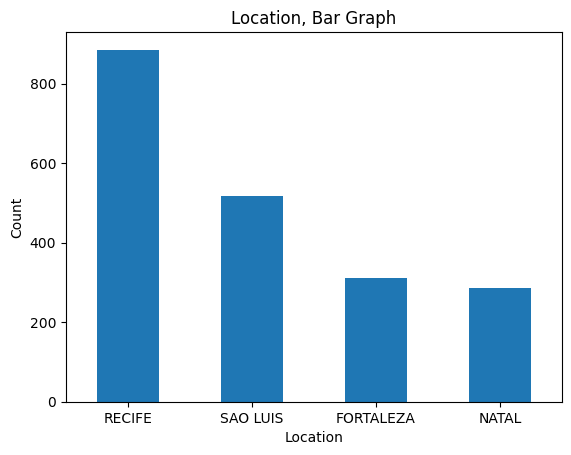

In [85]:
vis1 = df[['claim_id', 'location']].groupby('location').count()
vis1 = vis1.sort_values(by='claim_id', ascending=False)
ax = vis1.plot.bar(rot=0, legend=None)
ax.set_xlabel("Location")
ax.set_ylabel("Count")
ax.set_title("Location, Bar Graph")
plt.show()

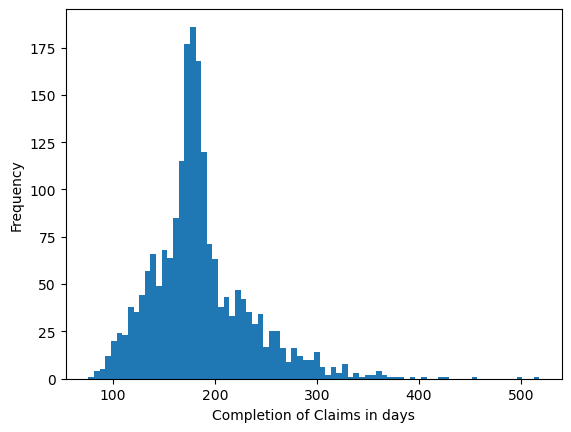

In [86]:
vis3 = df['time_to_close']
ax3 = vis3.plot.hist(bins=80)
ax3.set_xlabel("Completion of Claims in days")
plt.show()

Regarding the legal team's notification, their main goal was to close the claim cases faster. According to the above histogram, the completion of claims is positively skewed and has positive kurtosis, intensely occurring around the mean (185.57 days). If the team focuses on cases that take between 150 and 200 days, they encounter the most influential group to improve.

On the other hand, the outliers cause a higher standard deviation. The more the upper outliers decrease, the more the means respond immediately. Hence, the team has to focus on exploring the cause of common categories in variables such as cause and amount_paid.

In [91]:
print(df.groupby('location')['time_to_close'].median())
print(df.groupby('location')['time_to_close'].describe())

location
FORTALEZA    180.0
NATAL        179.0
RECIFE       178.0
SAO LUIS     179.0
Name: time_to_close, dtype: float64
           count        mean        std   min    25%    50%    75%    max
location                                                                 
FORTALEZA  311.0  185.305466  47.583000  76.0  157.0  180.0  205.5  453.0
NATAL      287.0  185.926829  47.059160  93.0  157.0  179.0  205.5  361.0
RECIFE     885.0  184.607910  48.013254  82.0  157.0  178.0  203.0  427.0
SAO LUIS   517.0  187.170213  53.126094  84.0  161.0  179.0  205.0  518.0


________________________________


|Location|Mean|Median|Range|
|---|---|---|---|
|FORTALEZA|185.31|180.00|377|
|NATAL|185.93|179.00|268|
|RECIFE|184.61|178.00|345|
|SAO LUIS|187.17|179.00|434|

In terms of the median and inner quartile range, the box plot shows that the categories of the location variable are highly similar. All location categories have upper outliers. Their means are slightly close. According to the graphic, "SAO LUIS" is the most positive skewed category, and also we may recognize it as comparing the median and mean.

In terms of ranges, NATAL has the narrowest. FORTALEZA and RECIFE are nearly the same. However, SAO LUIS has the broadest range and includes the highest outliers. These must be investigated in further studies to explore outliers' root causes.

### Distribution: Categories of Location (Box Plot)

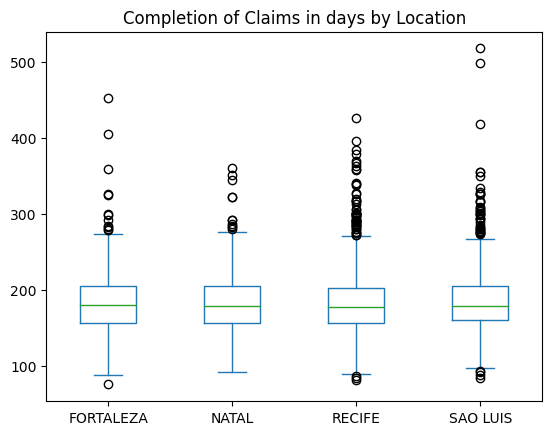

In [92]:
ax = df.plot.box(column="time_to_close", by="location", grid=False)
plt.title("Completion of Claims in days by Location")
plt.show()

#### Inner Quartile Ranges

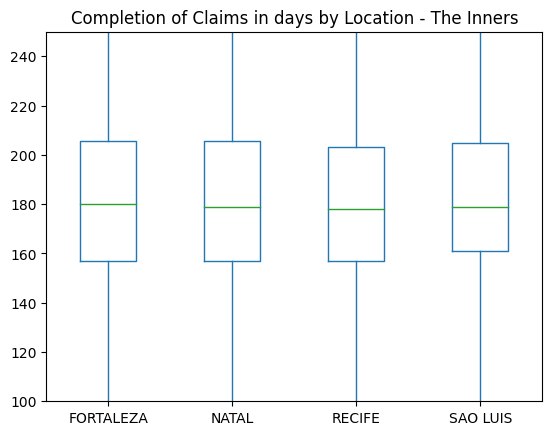

In [93]:
ax = df.plot.box(column="time_to_close", by="location", ylim=[100, 250], grid=False)
plt.title("Completion of Claims in days by Location - The Inners")
plt.show()

#### Upper Outliers

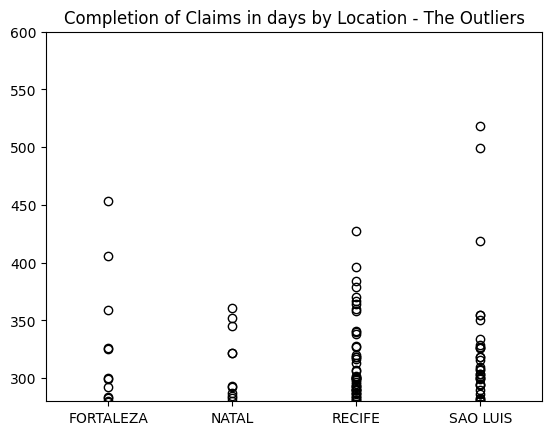

In [94]:
ax = df.plot.box(column="time_to_close", by="location", ylim=[280, 600], grid=False)
plt.title("Completion of Claims in days by Location - The Outliers")
plt.show()

In light of these findings, we understand that Vivendo's claim response duration does not differ much by category of location; however, <mark>SAO LUIS is the most spread</mark> one as a reply to the Head of the department.

_______________________
### Distribution: Categories of Location by Cause (Box Plot) 

According to the box plot below, Unknown and Meat categories affect the time_to_close variable's spread more than the vegetables. First and foremost, the *UNKNOWN* cause category of *SAO LUIS* pays to investigate. Moreover, the team must focus on the *UNKNOWN* cause category to reveal whether meat or vegetables. The related team has to investigate whether there is a sanitation problem in the production flow. If there is, it requires immediate fixes for the meat products. In this scope, the company must investigate the providers and examine the storage conditions to improve.

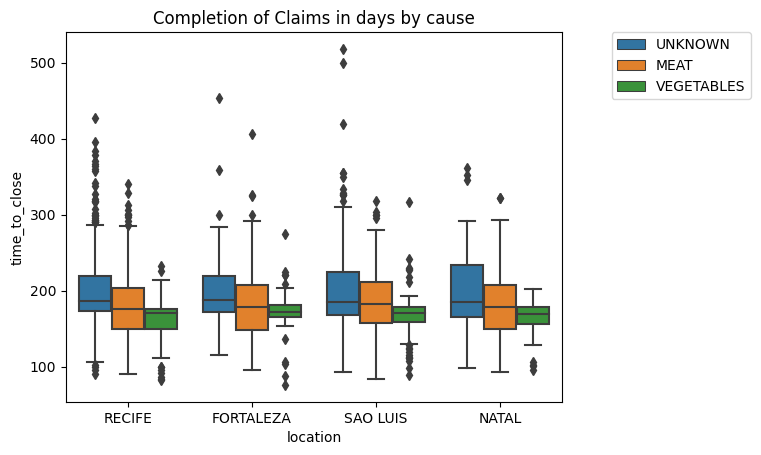

In [109]:
ax = sns.boxplot(data=df, x="location", y="time_to_close", hue="cause")
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.title("Completion of Claims in days by cause")
plt.show()

Regarding the findings, positive high and high-moderate correlations exist between *claim_amount, amount_paid, individuals_on_claim* and *time_to_close* variables. The **time_to_close** mainly correlated with **claim_amount**. Due to the mentioned correlation, the team might prioritize the records with the highest claim_amounted.

### Correlations of Completion Time

#### Scatter Plot, claim_amount - time_to_close


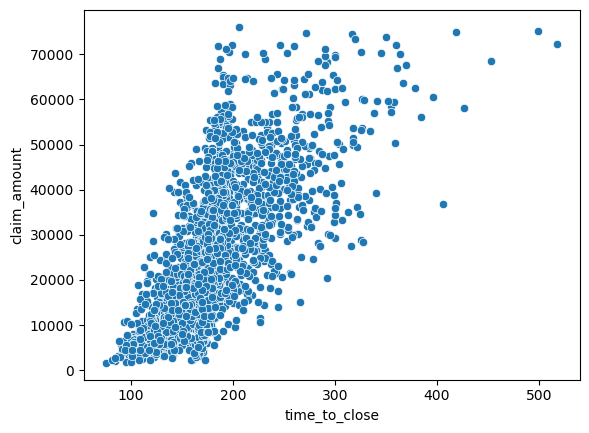

In [111]:
sns.scatterplot(data=df, x="time_to_close", y="claim_amount")
plt.show()

#### Scatter Plot, amount_paid - time_to_close

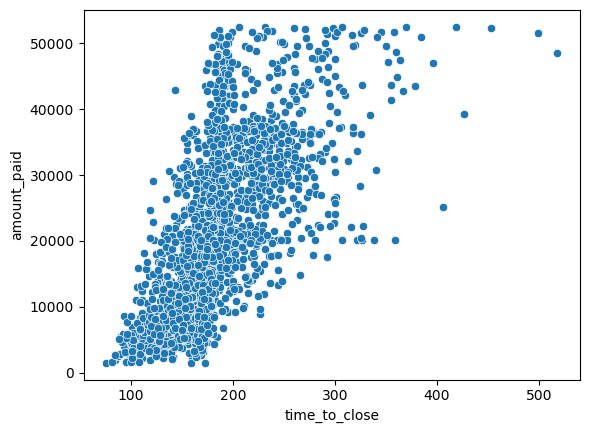

In [110]:
sns.scatterplot(data=df, x="time_to_close", y="amount_paid")
plt.show()

____________________
The team might examine the correlation between claim_amount and individuals_on_claim for further studies. They might reveal the effects of individuals_on_claim on marginal time cost and marginal productivity.


#### Correlations by Cause & Location (Hued by individuals_on_claim)

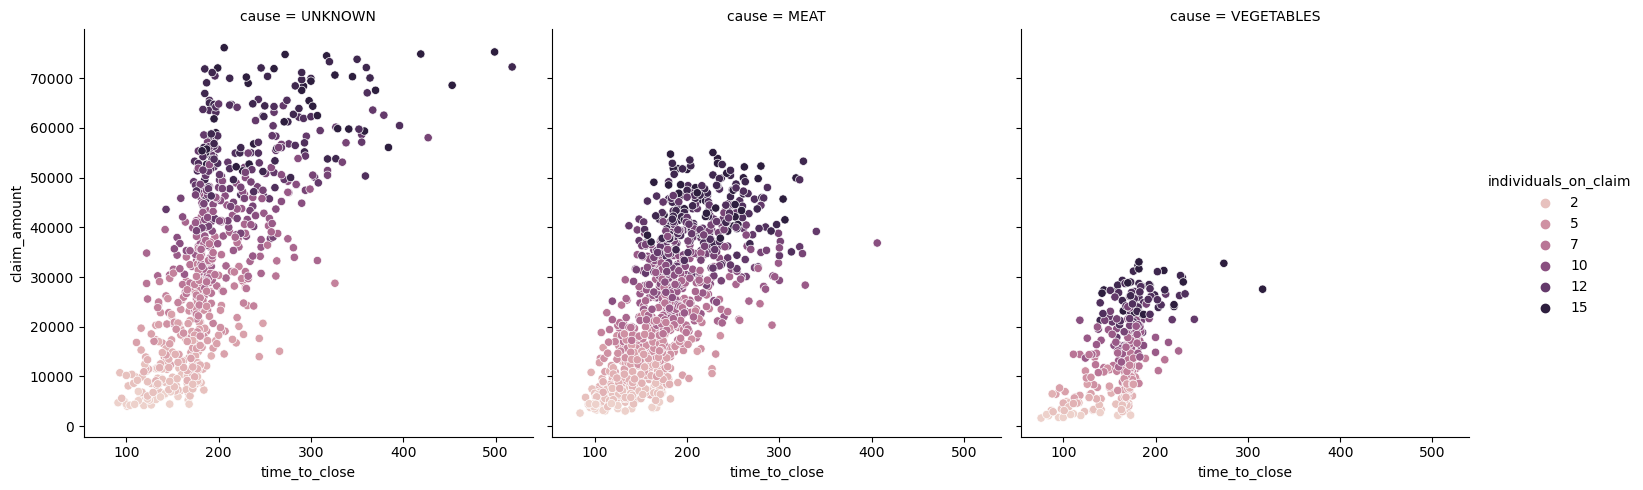

In [113]:
sns.relplot(data=df, x="time_to_close", y="claim_amount", hue="individuals_on_claim", col="cause")
plt.show()

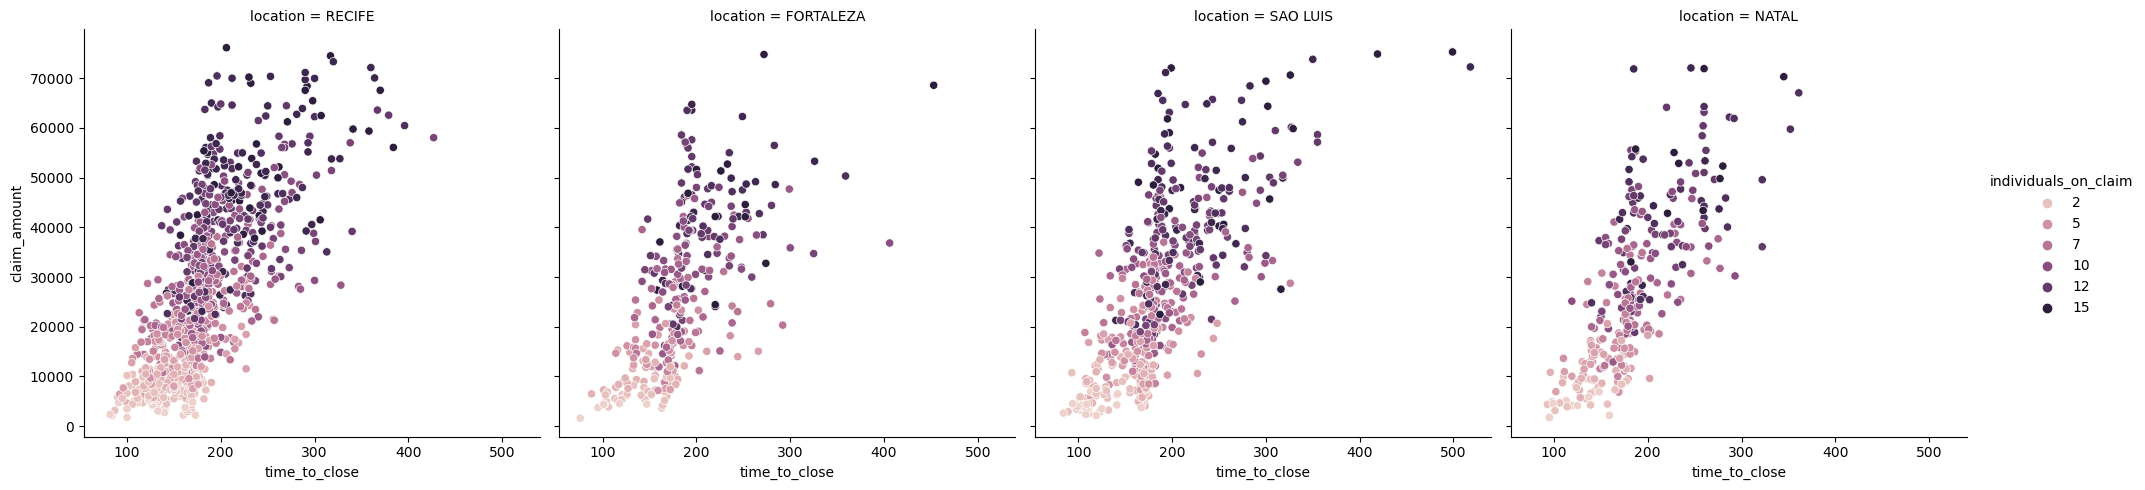

In [112]:
sns.relplot(data=df, x="time_to_close", y="claim_amount", hue="individuals_on_claim", col="location")
plt.show()

***Thanks for your kind interest***